#Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Loading Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/loan_data_set.csv")

##Dataset Information

In [98]:
print('First 5 rows of Dataframe:')
df.head()

First 5 rows of Dataframe:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
print('Last 5 rows of Dataframe:')
df.tail()

Last 5 rows of Dataframe:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [100]:
print('DataFrame Info:')
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [101]:
print('DataFrame Summary Statistics: ')
df.describe(include ='all')

DataFrame Summary Statistics: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [102]:
print('Dimensions of DataFrame: ')
print(df.shape)

Dimensions of DataFrame: 
(614, 13)


As can be seen, there are 614 observations and 13 columns in the data set.

In [103]:
print("Data Types of each column in DataFrame:")
df.dtypes

Data Types of each column in DataFrame:


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [104]:
print("Number of Unique Values in each column of DataFrame:")
df.nunique()

Number of Unique Values in each column of DataFrame:


,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


#Data Exploration

##Categorical Variable



###Loan ID

In [92]:
df.Loan_ID.value_counts(dropna=False)

,count
Loan_ID,
LP001002,1
LP002328,1
LP002305,1
LP002308,1
LP002314,1
...,...
LP001692,1
LP001693,1
LP001698,1


There are 614 unique ID in the dataset.

###Gender

In [93]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,489
Female,112
NaN,13


<ipython-input-94-4a1861040e11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


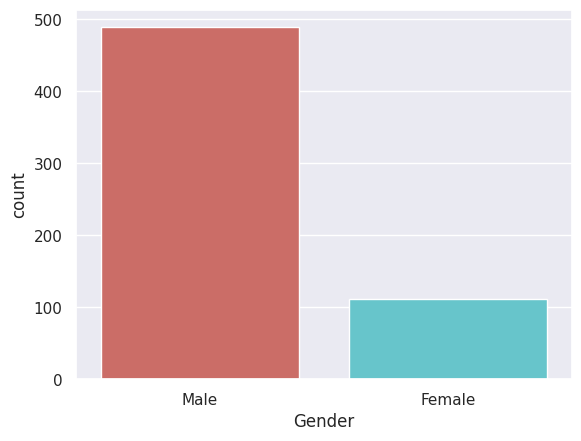

In [94]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [10]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

###Married

In [11]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,398
No,213
NaN,3


In [12]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

###Text

In [13]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


<ipython-input-14-8e9ea3c8e87a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


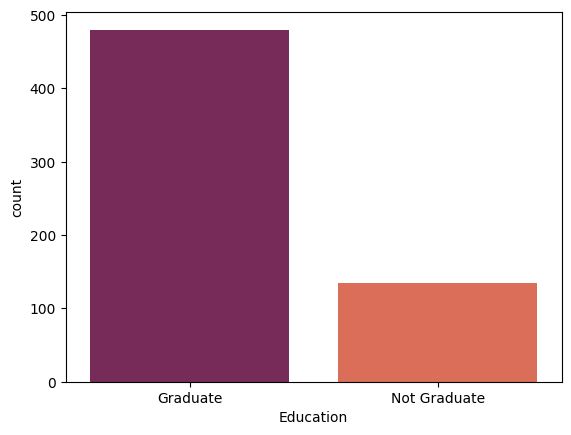

In [14]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [15]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

###Self Employed

In [16]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


<ipython-input-17-283837bf1c2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


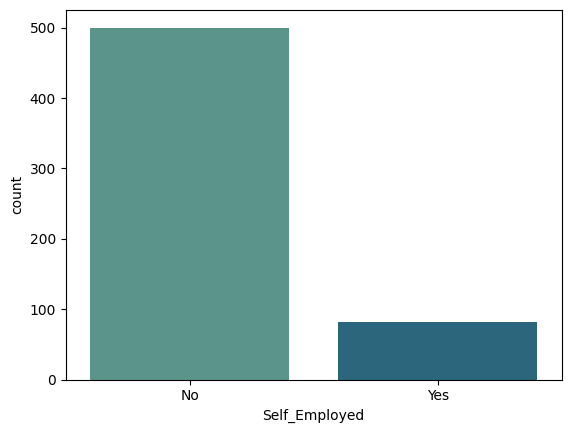

In [17]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [18]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

###Credit History

In [19]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


<ipython-input-20-b2abd7acd8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


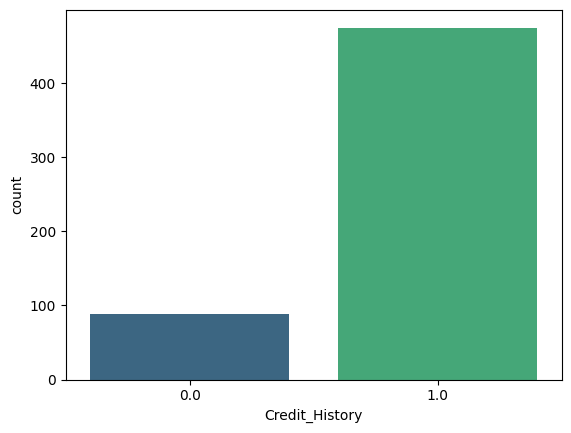

In [20]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [21]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

###Property Area

In [22]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


<ipython-input-23-3f0e29f42635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


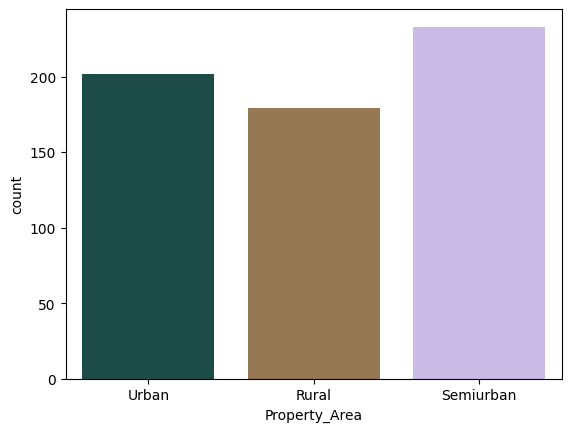

In [23]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [24]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

###Loan Status

In [25]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


<ipython-input-26-06b98ed0a451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


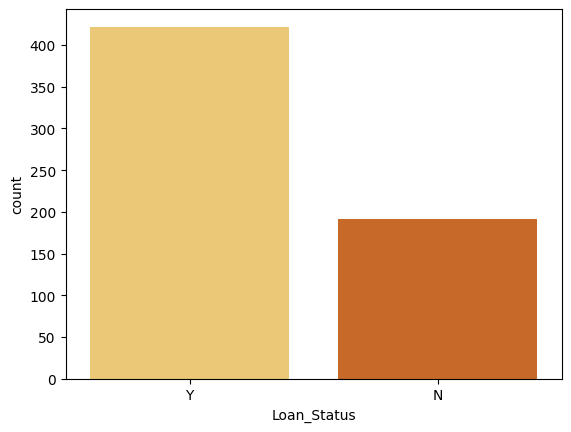

In [26]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [27]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

###Loan Amount Term

In [28]:
df.Loan_Amount_Term.value_counts(dropna=False)

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
NaN,14
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2


<ipython-input-29-88751c2297d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")


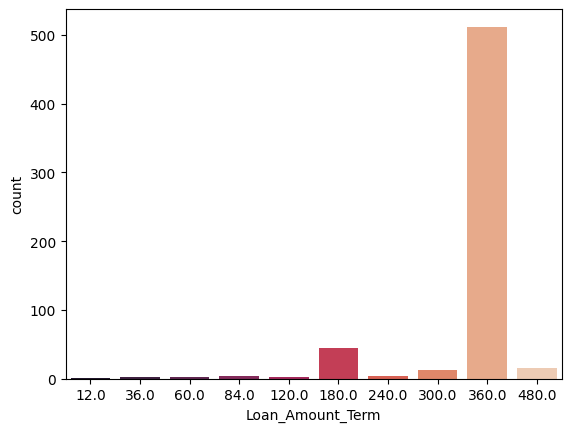

In [29]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [30]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


As can be seen from the results, the 360 days loan duration is the most popular compared to others.

##Numerical Variable

####Describe Numerical Variable

In [31]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


####Distribution of Numerical Variable

##### Histogram Distribution

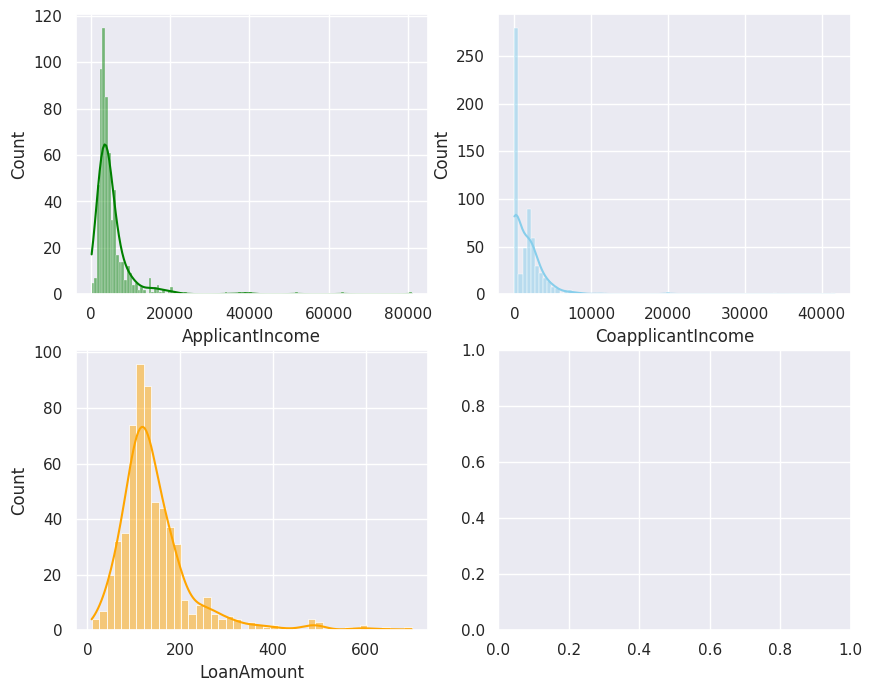

In [32]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

#####Violin Plot

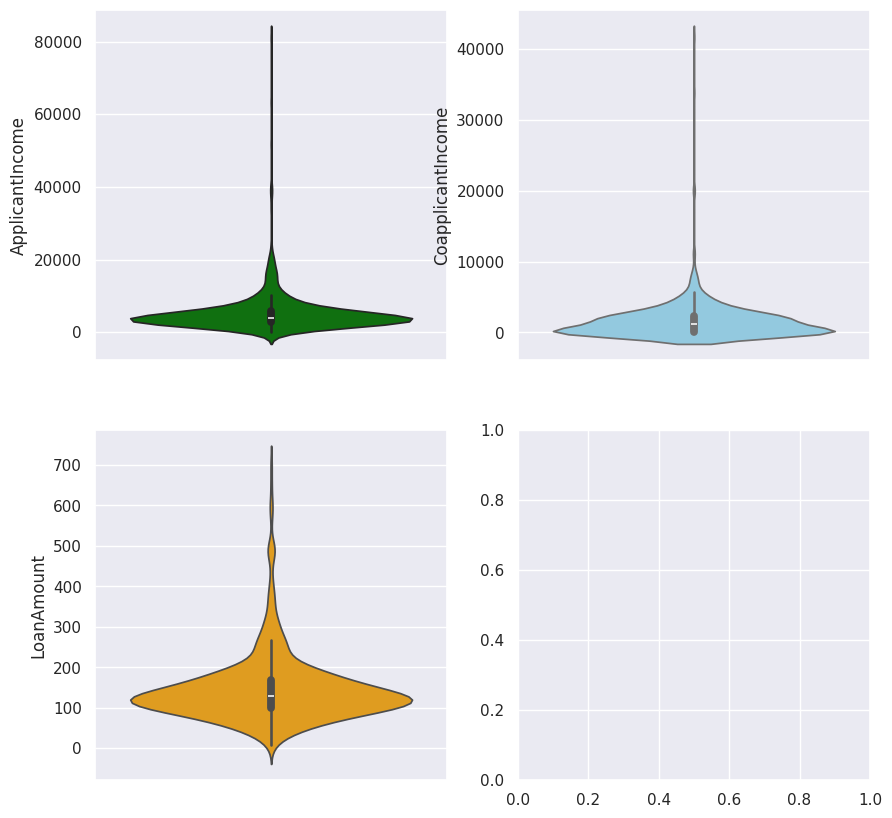

In [33]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).

The distribution of Loan Amount Term is negativly skewed and it has outliers.

##Other Exploration

###Categorical - Categorical

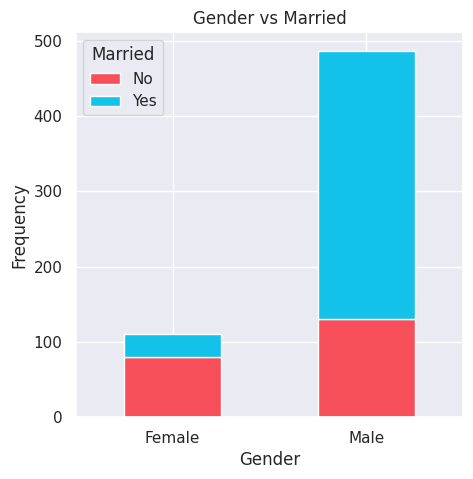

In [35]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

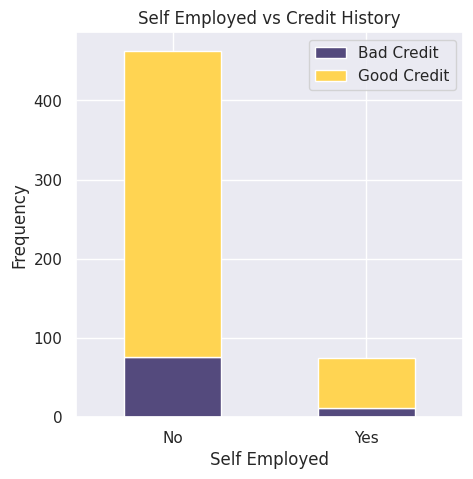

In [36]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

 Most not self employed applicants have good credit compared to self employed applicants.

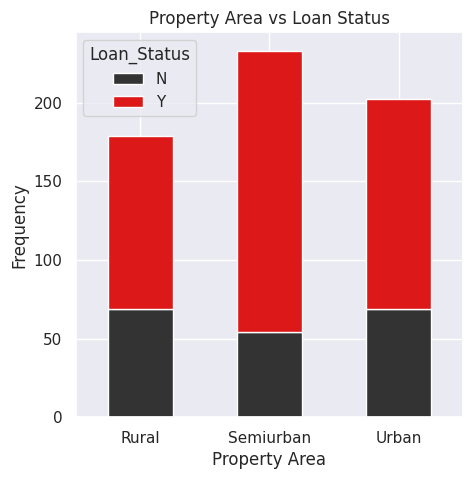

In [37]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

###Categorical - Numerical

<ipython-input-38-0a4d7fb48f1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


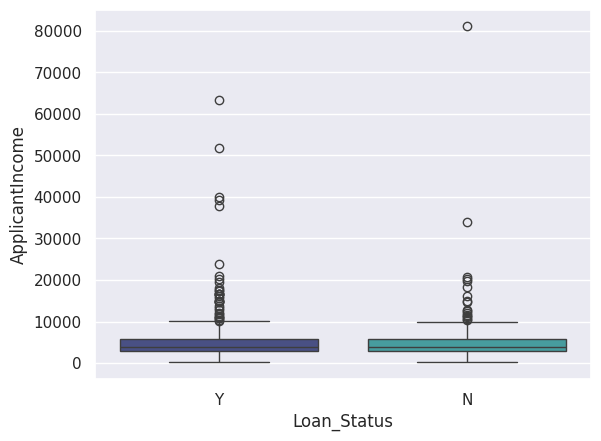

In [38]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

<ipython-input-39-e41ee8c4d05d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


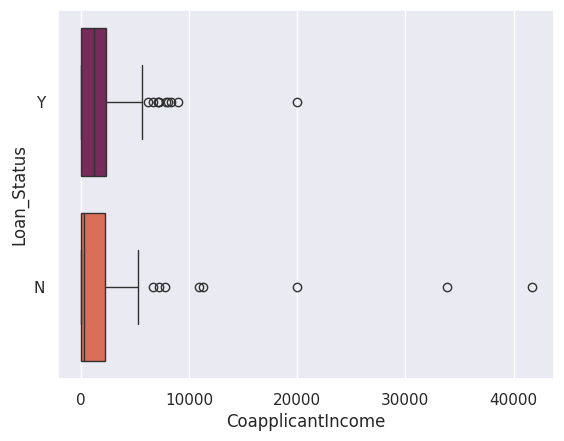

In [39]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

<ipython-input-40-7caa0fac4fb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


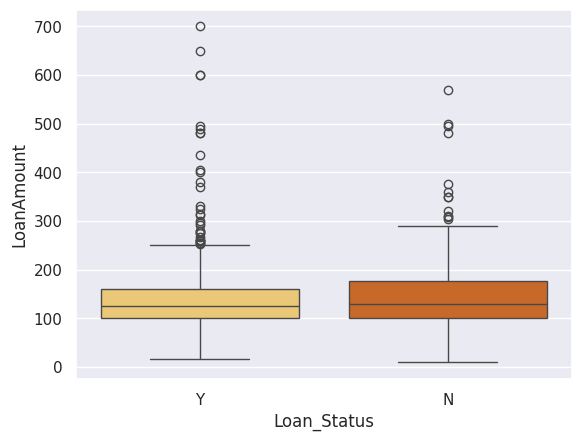

In [40]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

### Numerical - Numerical

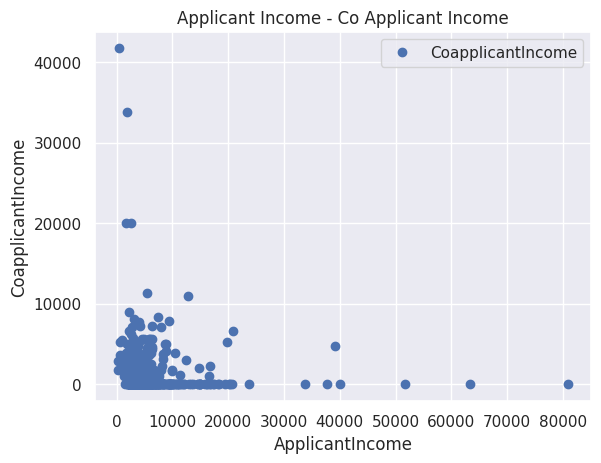

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [41]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

There is negative correlation between Applicant income and Co Applicant Income.

The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

## Null Values

In [42]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


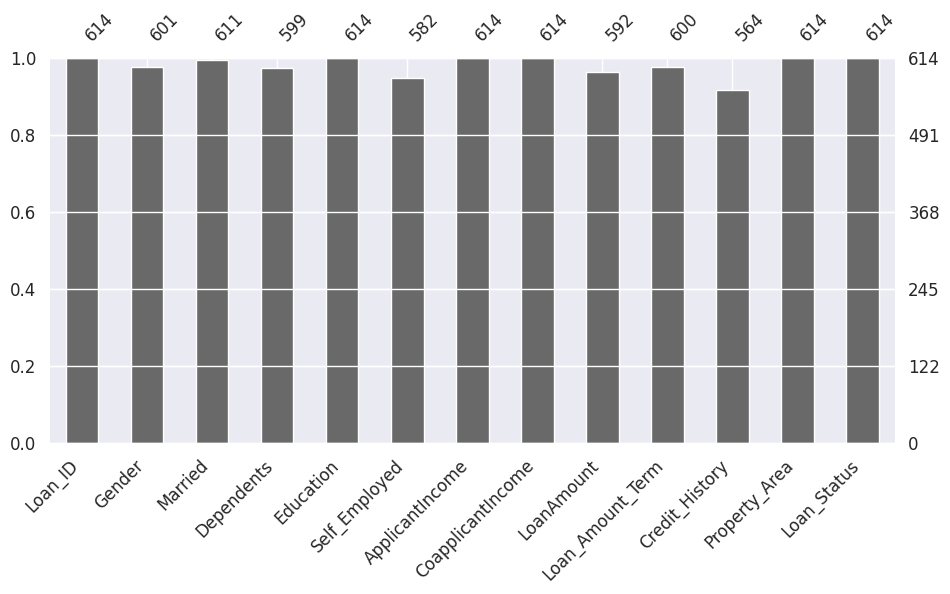

In [43]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored for all variables in the dataset.

#Data Preprocessing

##Drop Unecessary variables

In [6]:
df = df.drop(['Loan_ID'], axis = 1)

Unecessary variables will be dropped in this section.

## Data Imputation

###Categorical variables

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

###Numerical Variables

In [8]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

##One-hot Encoding

In [47]:
df = pd.get_dummies(df)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

###Remove Outliers & Infinite Values

In [50]:
for col in df.select_dtypes(include='bool'):
    df[col] = df[col].astype(int)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

### Skewed Distribution Treatment

In [51]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<ipython-input-51-2090245e4d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
<ipython-input-51-2090245e4d6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
<ipython-input-51-2090245e4d6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

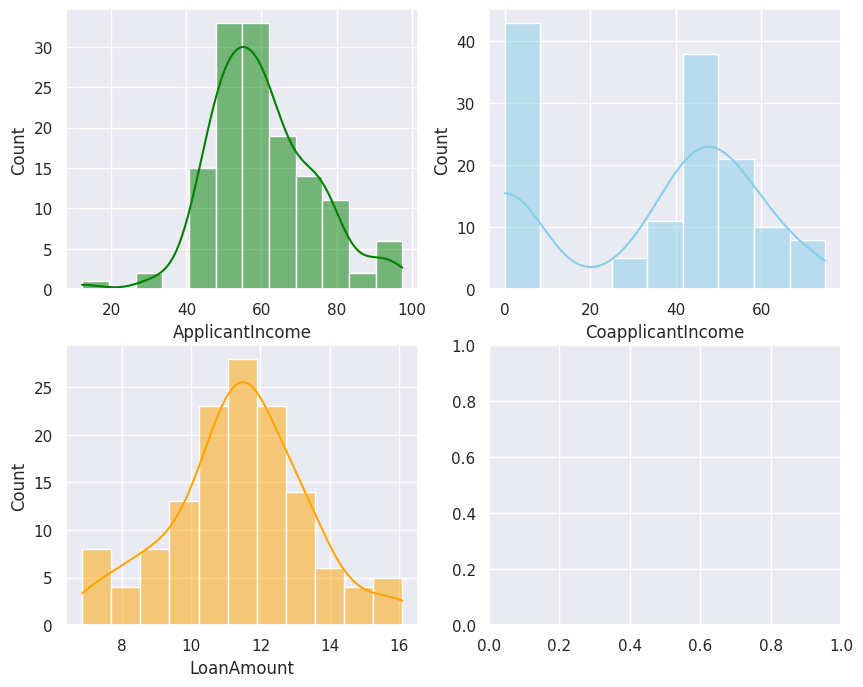

In [52]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

###Features separating

In [53]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

###SMOTE Technique

In [54]:
X, y = SMOTE().fit_resample(X, y)

<ipython-input-55-464dc99333fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


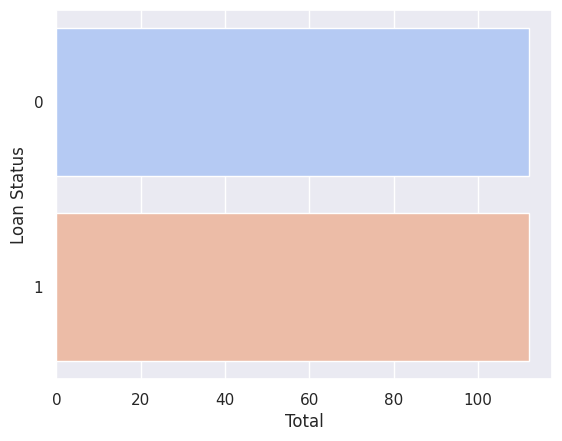

In [55]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

###Data Normalization

In [56]:
X = MinMaxScaler().fit_transform(X)

###Splitting Dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Models

##Logistic Regression

In [58]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.75      0.82      0.78        22

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

[[17  6]
 [ 4 18]]
LR accuracy: 77.78%


##K-Nearest Neighbour (KNN)

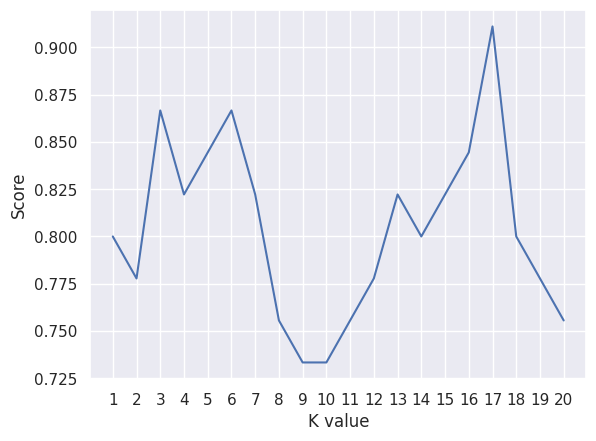


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.91      0.91      0.91        22

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[21  2]
 [ 2 20]]
KNN best accuracy: 91.11%


In [82]:
scoreListknn = []
best_knn_model = None
best_knn_accuracy = 0
best_knn_report = ""
best_knn_confusion_matrix = None

for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)

    y_pred = KNclassifier.predict(X_test)

    accuracy = KNclassifier.score(X_test, y_test)
    scoreListknn.append(accuracy)

    if accuracy > best_knn_accuracy:
        best_knn_accuracy = accuracy
        best_knn_model = KNclassifier
        best_knn_report = classification_report(y_test, y_pred)
        best_knn_confusion_matrix = confusion_matrix(y_test, y_pred)

plt.plot(range(1, 21), scoreListknn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print()
print(best_knn_report)
print(best_knn_confusion_matrix)
print("KNN best accuracy: {:.2f}%".format(best_knn_accuracy * 100))

## Support Vector Machine (SVM)

In [60]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.77      0.91      0.83        22

    accuracy                           0.82        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

[[17  6]
 [ 2 20]]
SVC accuracy: 82.22%


##Naive Bayes

###Categorical NB

In [61]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.75      0.82      0.78        22

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

[[17  6]
 [ 4 18]]
Categorical Naive Bayes accuracy: 77.78%


###Gaussian NB

In [62]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.61      0.96      0.75        23
           1       0.89      0.36      0.52        22

    accuracy                           0.67        45
   macro avg       0.75      0.66      0.63        45
weighted avg       0.75      0.67      0.63        45

[[22  1]
 [14  8]]
Gaussian Naive Bayes accuracy: 66.67%


##Decision Tree

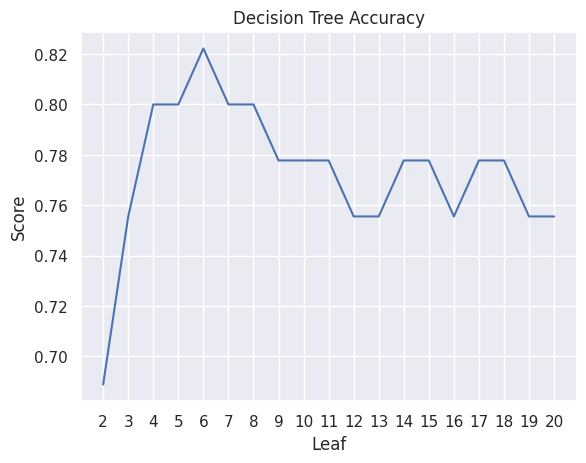


              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.79      0.86      0.83        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

[[18  5]
 [ 3 19]]
Decision Tree Accuracy: 82.22%


In [78]:
scoreListDT = []
precisionList = []
recallList = []
f1List = []
best_report = ""
best_confusion_matrix = None

for i in range(2, 21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    y_pred = DTclassifier.predict(X_test)

    scoreListDT.append(DTclassifier.score(X_test, y_test))

    precisionList.append(precision_score(y_test, y_pred, average='weighted'))
    recallList.append(recall_score(y_test, y_pred, average='weighted'))
    f1List.append(f1_score(y_test, y_pred, average='weighted'))

    if scoreListDT[-1] == max(scoreListDT):
        best_report = classification_report(y_test, y_pred)
        best_confusion_matrix = confusion_matrix(y_test, y_pred)

plt.plot(range(2, 21), scoreListDT, label='Accuracy')
plt.xticks(np.arange(2, 21, 1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.title("Decision Tree Accuracy")
plt.show()

DTAcc = max(scoreListDT)
DTPrecision = precisionList[scoreListDT.index(DTAcc)]
DTRecall = recallList[scoreListDT.index(DTAcc)]
DTF1 = f1List[scoreListDT.index(DTAcc)]

print()
print(best_report)
print(best_confusion_matrix)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc * 100))

##Random Forest

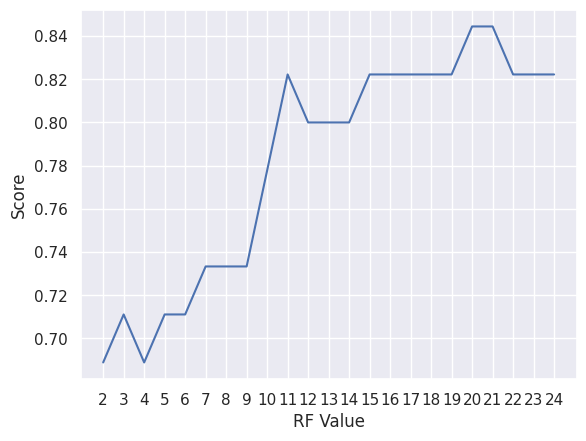


              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45

[[20  3]
 [ 4 18]]
Random Forest Accuracy:  84.44%


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

scoreListRF = []
best_model = None
best_accuracy = 0
best_report = ""
best_confusion_matrix = None

for i in range(2, 25):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)

    y_pred = RFclassifier.predict(X_test)

    accuracy = RFclassifier.score(X_test, y_test)
    scoreListRF.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = RFclassifier
        best_report = classification_report(y_test, y_pred)
        best_confusion_matrix = confusion_matrix(y_test, y_pred)

plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

print()
print(best_report)
print(best_confusion_matrix)
print("Random Forest Accuracy:  {:.2f}%".format(best_accuracy * 100))

##Gradient Boosting

In [65]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [66]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [67]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=50, n_estimators=400,
                           subsample=1)
0.8388888888888889
{'subsample': 1, 'n_estimators': 400, 'max_leaf_nodes': 50, 'max_depth': 4}
6


In [75]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        23
           1       0.68      0.68      0.68        22

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45

[[16  7]
 [ 7 15]]
Gradient Boosting accuracy: 68.89%


#Model Comparison

In [95]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM', 'Categorical NB',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, best_knn_accuracy*100, SVCAcc*100,
                                     NBAcc1*100, NBAcc2*100, DTAcc*100,
                                     best_accuracy*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
1,K Neighbors,91.111111
6,Random Forest,84.444444
2,SVM,82.222222
5,Decision Tree,82.222222
0,Logistic Regression,77.777778
3,Categorical NB,77.777778
7,Gradient Boost,68.888889
4,Gaussian NB,66.666667


##Comparison of Model Performance (1)

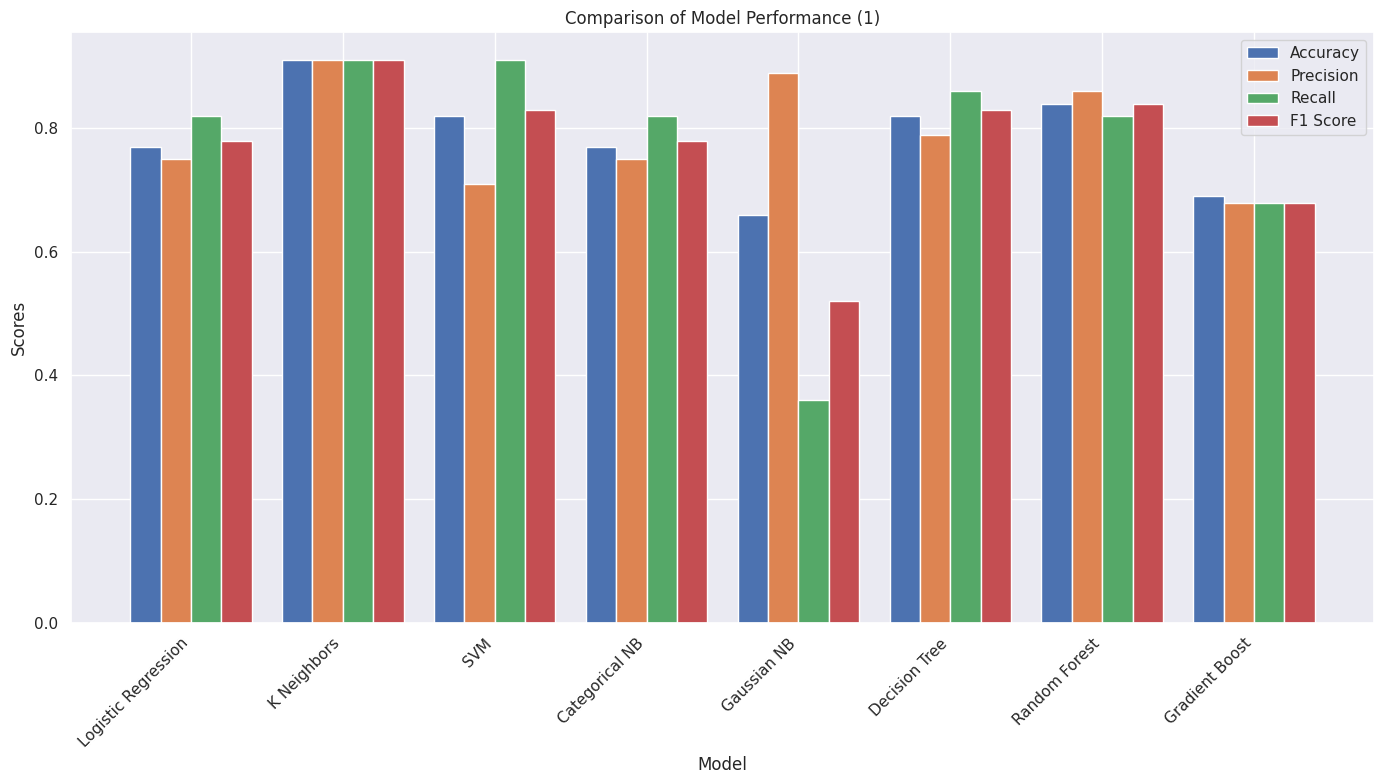

In [108]:
performance_data = {
    'Model': ['Logistic Regression', 'K Neighbors', 'SVM',
              'Categorical NB', 'Gaussian NB', 'Decision Tree',
              'Random Forest', 'Gradient Boost'],
    'Accuracy': [0.77, 0.91, 0.82, 0.77, 0.66, 0.82, 0.84, 0.69],
    'Precision': [0.75, 0.91, 0.71, 0.75, 0.89, 0.79, 0.86, 0.68],
    'Recall': [0.82, 0.91, 0.91, 0.82, 0.36, 0.86, 0.82, 0.68],
    'F1 Score': [0.78, 0.91, 0.83, 0.78, 0.52, 0.83, 0.84, 0.68]
}

df = pd.DataFrame(performance_data)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(df['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - 1.5*width, df['Accuracy'], width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, df['Precision'], width, label='Precision')
bars3 = ax.bar(x + 0.5*width, df['Recall'], width, label='Recall')
bars4 = ax.bar(x + 1.5*width, df['F1 Score'], width, label='F1 Score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (1)')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


The K-Nearest Neighbors model demonstrates the most consistent and highest performance across all metrics, making it the top-performing model in this comparison, while the Gaussian NB model shows the poorest performance, particularly in recall and F1 score.


##Comparison of Model Performance (0)

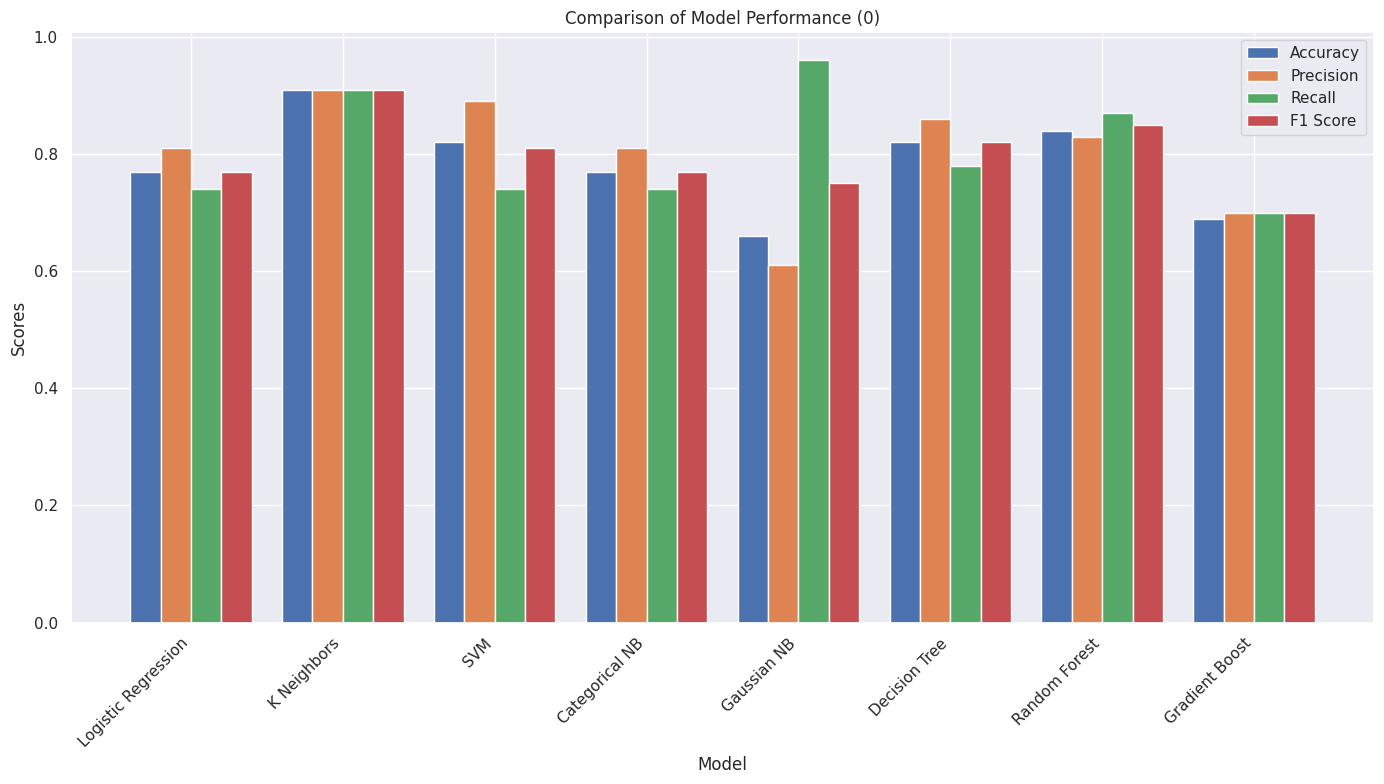

In [107]:
performance_data = {
    'Model': ['Logistic Regression', 'K Neighbors', 'SVM',
              'Categorical NB', 'Gaussian NB', 'Decision Tree',
              'Random Forest', 'Gradient Boost'],
    'Accuracy': [0.77, 0.91, 0.82, 0.77, 0.66, 0.82, 0.84, 0.69],
    'Precision': [0.81, 0.91, 0.89, 0.81, 0.61, 0.86, 0.83, 0.7],
    'Recall': [0.74, 0.91, 0.74, 0.74, 0.96, 0.78, 0.87, 0.7],
    'F1 Score': [0.77, 0.91, 0.81, 0.77, 0.75, 0.82, 0.85, 0.7]
}

df = pd.DataFrame(performance_data)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(df['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - 1.5*width, df['Accuracy'], width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, df['Precision'], width, label='Precision')
bars3 = ax.bar(x + 0.5*width, df['Recall'], width, label='Recall')
bars4 = ax.bar(x + 1.5*width, df['F1 Score'], width, label='F1 Score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (0)')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

The K-Nearest Neighbors model exhibits the most consistent and highest performance across all metrics, while the Gaussian NB model, despite its high recall, struggles with lower precision and F1 score, making it the weakest performer overall.
